# Tópico 03 – Análise Exploratória de Dados (EDA)

In [129]:
import pandas as pd
import seaborn as sns

In [130]:
df = pd.read_csv('../data/dados_vendas_limpo.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Data_Venda      100 non-null    object
 1   Produto         100 non-null    object
 2   Cidade          100 non-null    object
 3   Quantidade      100 non-null    int64 
 4   Preco_Unitario  100 non-null    int64 
 5   Valor_Total     100 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [131]:
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])
df['Data_Venda'] = df['Data_Venda'].dt.date
df['Preco_Unitario'] = df['Preco_Unitario'].astype('float')
df['Valor_Total'] = df['Valor_Total'].astype('float')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Data_Venda      100 non-null    object 
 1   Produto         100 non-null    object 
 2   Cidade          100 non-null    object 
 3   Quantidade      100 non-null    int64  
 4   Preco_Unitario  100 non-null    float64
 5   Valor_Total     100 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


In [133]:
df.head()

,Data_Venda,Produto,Cidade,Quantidade,Preco_Unitario,Valor_Total
0,2024-01-01,Mouse,Salvador,2,2897.0,5794.0
1,2024-01-02,Impressora,São Paulo,2,1793.0,3586.0
2,2024-01-03,Teclado,São Paulo,6,2185.0,13110.0
3,2024-01-04,Impressora,São Paulo,7,2377.0,16639.0
4,2024-01-05,Impressora,São Paulo,5,662.0,3310.0


In [134]:
df.describe()

,Quantidade,Preco_Unitario,Valor_Total
count,100.000000,100.000000,100.000000
mean,4.760000,1556.380000,7061.600000
std,2.636649,856.608851,5673.038576
min,1.000000,104.000000,508.000000
25%,3.000000,795.250000,2580.750000
50%,4.000000,1602.000000,5182.000000
75%,7.000000,2382.750000,10952.000000
max,9.000000,2975.000000,25497.000000


In [135]:
df.groupby('Cidade')['Valor_Total'].sum()

Cidade
Belo Horizonte    159273.0
Curitiba          197624.0
Rio de Janeiro     63763.0
Salvador          107453.0
São Paulo         178047.0
Name: Valor_Total, dtype: float64

In [136]:
df.groupby('Produto')['Valor_Total'].sum()

Produto
Headset       126817.0
Impressora    151388.0
Monitor       109422.0
Mouse         150980.0
Notebook      100229.0
Teclado        67324.0
Name: Valor_Total, dtype: float64

Text(0.5, 0, 'Cidades')

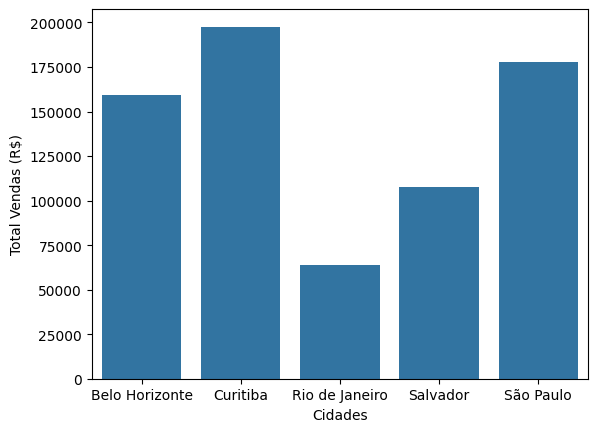

In [137]:
valorPorCidade = sns.barplot(df.groupby('Cidade')['Valor_Total'].sum())
valorPorCidade.set_ylabel('Total Vendas (R$)')
valorPorCidade.set_xlabel('Cidades')

Text(0.5, 0, 'Produtos')

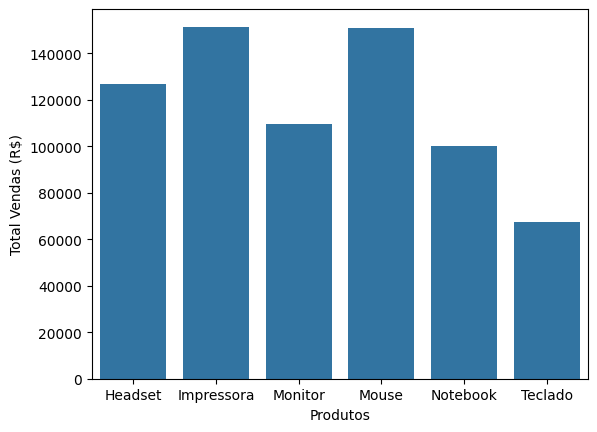

In [138]:
ValorTotalProduto = sns.barplot(df.groupby('Produto')['Valor_Total'].sum())
ValorTotalProduto.set_ylabel('Total Vendas (R$)')
ValorTotalProduto.set_xlabel('Produtos')